<a href="https://colab.research.google.com/github/AnkitaSK/AB-Image-Classification/blob/RogenJosh/mainCIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Preprocessing



In [30]:
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import tensorflow as tf

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print(x_train.shape)
print(y_train.shape)

x_train_val = x_train[-10000:]
y_train_val = y_train[-10000:]

x_train = x_train[:-10000]
y_train = y_train[:-10000]

(50000, 32, 32, 3)
(50000, 1)


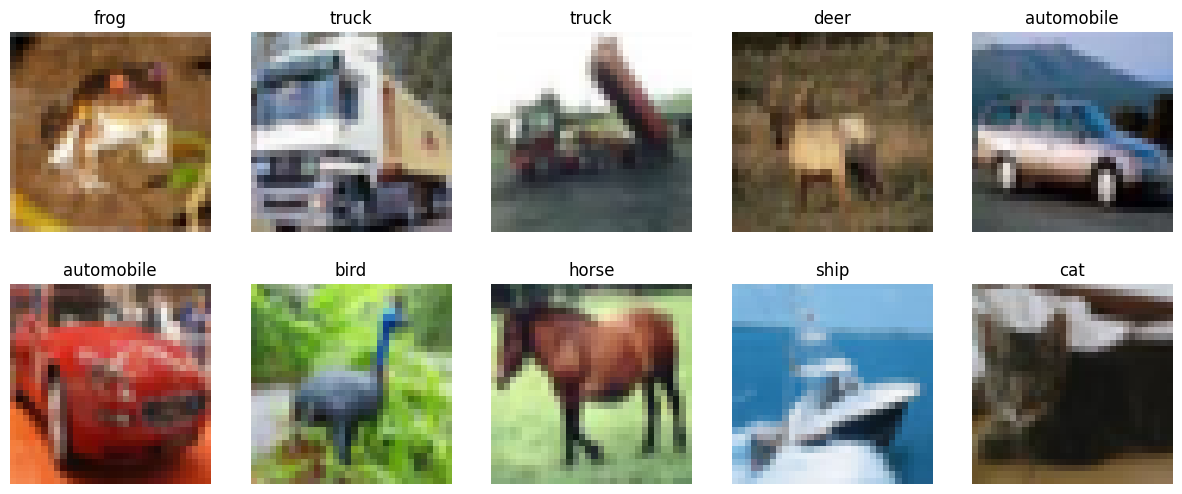

In [31]:
#Visualize the images in CIFAR-10 dataset. Create a 10 x 10 plot showing 10 random samples from each class.

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'] # Define the class names

# Create a 2 x 5 plot of the first 10 images in the CIFAR-10 dataset
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
# Flatten the axes into a 1D array
axes = axes.flatten()


# Plot the first 10 images in the CIFAR-10 dataset
for i in range(10):  # Loop through the first 10 images
    axes[i].imshow(x_train[i])  # Display the image
    class_label = class_names[y_train[i][0]]  # Get the class name for the label
    axes[i].set_title(class_label)  # Set the title of the image
    axes[i].axis('off')  # Turn off the axis

plt.show() # Display the plot


Data Normalization - Resizing - Agumentation (to be done)


In [35]:
#normalize the data by dividing by 255 to scale the pixel values between 0 and 1

x_train_ = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
x_train_val = x_train_val.astype('float32') / 255

print('shape of x train normalized', x_train.shape)
print('shape of x test normalized', x_test.shape)
print('shape of x train validation', x_train_val.shape)


shape of x train normalized (40000, 32, 32, 3)
shape of x test normalized (10000, 32, 32, 3)
shape of x train validation (10000, 32, 32, 3)


In [39]:
# the images to 32x32 pixels to match the input size of the model

x_train = resize(x_train, [32, 32])
x_test = resize(x_test, [32, 32])
x_train_val = resize(x_train_val, [32, 32])

print(x_train.shape)
print(x_test.shape)
print(x_train_val.shape)


(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


Model Architecture

In [40]:
print(tf.__version__)

2.17.0
